<a href="https://colab.research.google.com/github/springboardmentor447/AI_STYLIST_Infosys_Internship_Oct2024/blob/Mohammed-ghouse/colaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT
100% 564M/565M [00:19<00:00, 31.4MB/s]
100% 565M/565M [00:19<00:00, 30.4MB/s]
Dataset extracted to dataset
Extracted files: ['myntradataset', 'images', 'styles.csv']

CSV Loaded Successfully
Dataset Shape: (44424, 10)

Dataset Head:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue J

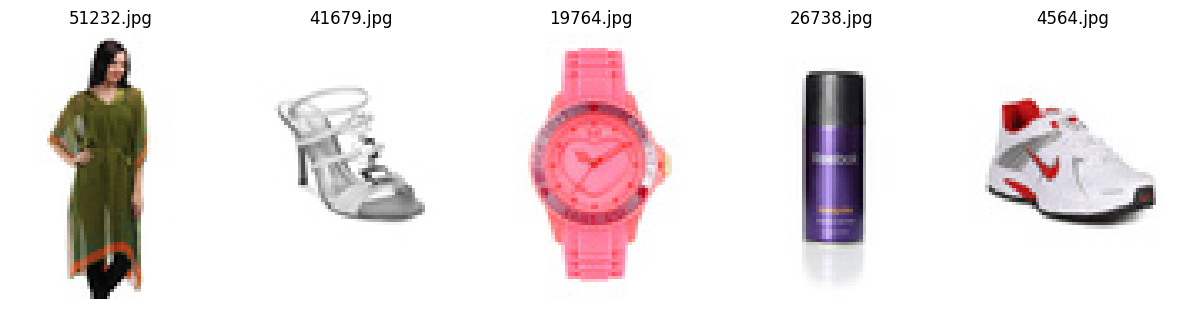

In [ ]:
import os
import json
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Kaggle API Setup
kaggle_credentials = {
    "username": "Ghouse@1029",
    "key": "9894288572"
}

# Write Kaggle API credentials to kaggle.json
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_credentials, f)

# Set permissions for the Kaggle API file
!chmod 600 ~/.kaggle/kaggle.json

# Specify the Kaggle dataset to download
dataset = "paramaggarwal/fashion-product-images-small"

# Download the dataset
!kaggle datasets download -d {dataset}

# Extract the dataset
import zipfile
zip_file = dataset.split("/")[-1] + ".zip"  # Generate the zip file name
output_dir = "dataset"  # Specify the output directory

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Dataset extracted to {output_dir}")
print("Extracted files:", os.listdir(output_dir))

# Load and clean the CSV file
csv_path = os.path.join(output_dir, "styles.csv")
try:
    # Read CSV and handle rows with mismatched columns by skipping them
    df = pd.read_csv(csv_path, on_bad_lines='skip', engine='python')
    print("\nCSV Loaded Successfully")
    print("Dataset Shape:", df.shape)
    print("\nDataset Head:")
    print(df.head())
except Exception as e:
    print("Error loading the CSV file:", e)

# Display the first 5 images from the images folder
def display_images(image_folder, num_images=5):
    # List image files
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('jpg', 'jpeg', 'png'))][:num_images]

    if not image_files:
        print("No images found in the folder!")
        return

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_folder, image_file)
        try:
            img = Image.open(image_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(image_file)
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

    plt.show()

# Display top 5 images
image_folder = os.path.join(output_dir, "images")
print("\nDisplaying Top 5 Images:")
display_images(image_folder, num_images=5)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None


In [ ]:
print(df.describe())


                 id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000


In [ ]:
print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# After dropping columns with too many missing values, drop rows with any remaining nulls
df_cleaned = df.dropna ()



# Display cleaned dataset shape
print(f"Cleaned Dataset Shape: {df_cleaned.shape}")
print(f"Columns after cleaning: {df.columns.tolist()}")


Cleaned Dataset Shape: (44077, 10)
Columns after cleaning: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']


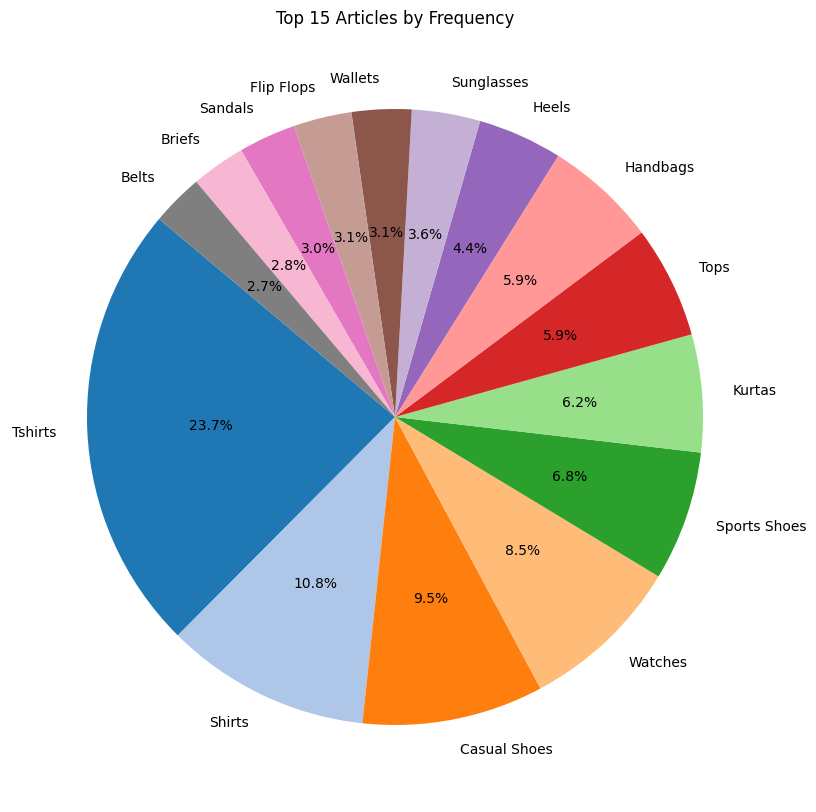

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'articleType' and count occurrences
article_counts = df['articleType'].value_counts()

# Select the top 15 articles
top_15_articles = article_counts.head(15)

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    top_15_articles,
    labels=top_15_articles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors[:len(top_15_articles)]
)
plt.title("Top 15 Articles by Frequency")
plt.show()

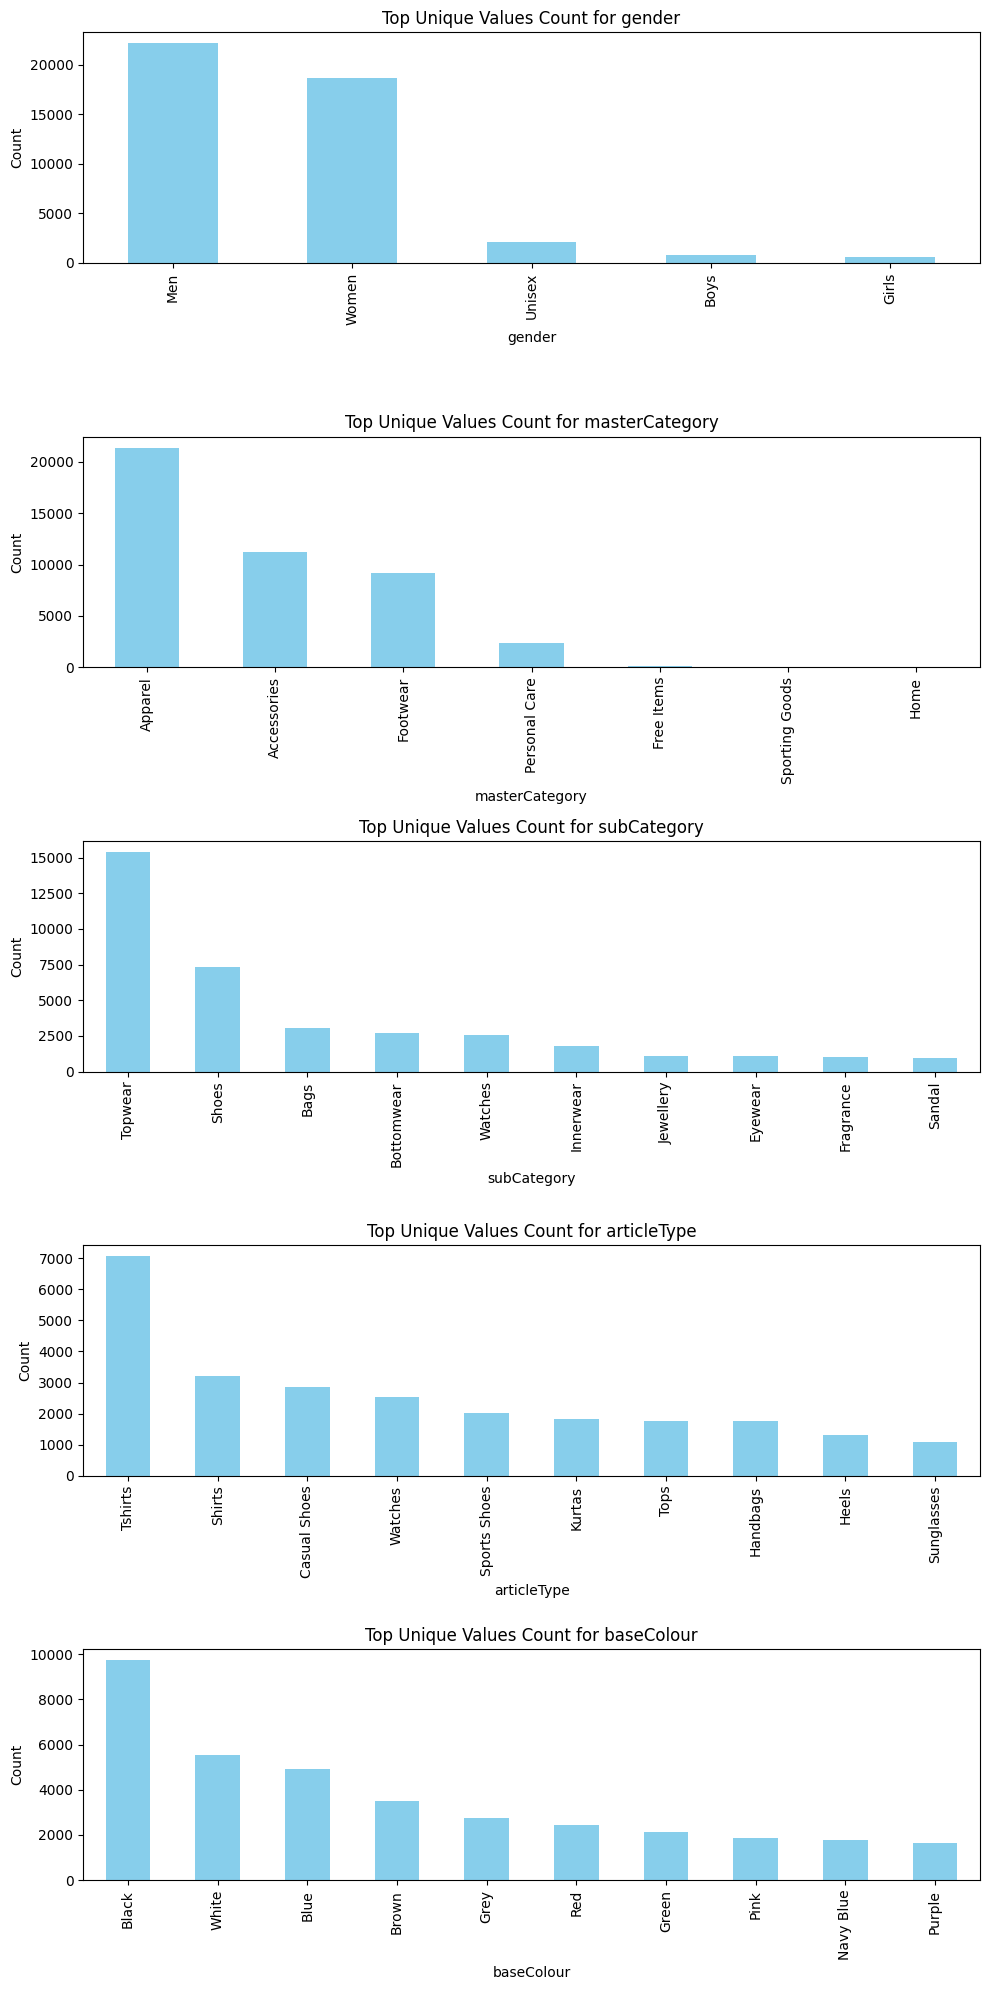

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the categorical columns to visualize
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour']

# Set up the figure for multiple plots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 20))

# Iterate over the categorical columns and plot their unique counts
for ax, column in zip(axes, categorical_columns):
    unique_counts = df[column].value_counts().head(10)  # Get top 10 unique counts
    unique_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Top Unique Values Count for {column}')
    ax.set_ylabel('Count')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:

# Create a new feature 'image_name' by appending '.jpeg' to the 'id'
df['image_name'] = df['id'].astype(str) + '.jpg'

# Display the updated DataFrame
print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName image_name  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg   
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg   
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg   
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg   

  image_embedding  
0            None  
1            Non

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import time

# Define constants
img_width, img_height = 224, 224  # Input dimensions for VGG16
path = "/content/dataset/myntradataset/images/"

# Load the pre-trained model
model1 = VGG16(weights='imagenet', include_top=False, pooling='avg')  # Average pooling for embeddings

# Define helper functions
def img_path(img):
    """Construct the full path to the image."""
    return path + img

def model_predict(model, img_name):
    """Generate embeddings for the given image."""
    try:
        # Load and preprocess the image
        img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Predict and return the embedding
        return model.predict(x).reshape(-1)
    except FileNotFoundError:
        # Return a zero vector for missing images
        return np.zeros((model.output_shape[1],))
    except Exception as e:
        # Return a zero vector for errors
        return np.zeros((model.output_shape[1],))

# Copy the DataFrame
df_copy1 = df.copy()

# Start measuring time
start_time = time.time()

# Generate embeddings with a progress bar
embeddings = []
for img_name in tqdm(df_copy1['image_name'], desc="Generating Image Embeddings", unit="image"):
    embedding = model_predict(model1, img_name)
    embeddings.append(embedding)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Expand embeddings into a DataFrame
df_embedding1 = pd.DataFrame(embeddings)

# Print completion details
print("\nEmbedding generation completed.")
print(f"Time taken: {elapsed_time:.2f} seconds")
print("First 5 rows of generated embeddings:")
print(df_embedding1.head(5))


Generating Image Embeddings:   0%|          | 0/44424 [00:00<?, ?image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating Image Embeddings:   0%|          | 1/44424 [00:00<9:14:59,  1.33image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating Image Embeddings:   0%|          | 2/44424 [00:01<8:16:43,  1.49image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating Image Embeddings:   0%|          | 3/44424 [00:01<7:58:36,  1.55image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 4/44424 [00:02<7:46:02,  1.59image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating Image Embeddings:   0%|          | 5/44424 [00:03<8:03:31,  1.53image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating Image Embeddings:   0%|          | 6/44424 [00:03<7:53:01,  1.57image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating Image Embeddings:   0%|          | 7/44424 [00:04<7:49:06,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating Image Embeddings:   0%|          | 8/44424 [00:05<7:43:36,  1.60image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 9/44424 [00:05<7:38:46,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating Image Embeddings:   0%|          | 10/44424 [00:06<7:37:53,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating Image Embeddings:   0%|          | 11/44424 [00:06<7:30:32,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 12/44424 [00:07<7:28:20,  1.65image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating Image Embeddings:   0%|          | 13/44424 [00:08<7:24:08,  1.67image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating Image Embeddings:   0%|          | 14/44424 [00:08<7:23:31,  1.67image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating Image Embeddings:   0%|          | 15/44424 [00:09<7:31:08,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step


Generating Image Embeddings:   0%|          | 16/44424 [00:10<8:58:30,  1.37image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step


Generating Image Embeddings:   0%|          | 17/44424 [00:11<10:11:08,  1.21image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


Generating Image Embeddings:   0%|          | 18/44424 [00:12<10:51:30,  1.14image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating Image Embeddings:   0%|          | 19/44424 [00:13<11:43:57,  1.05image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating Image Embeddings:   0%|          | 20/44424 [00:14<10:30:24,  1.17image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 21/44424 [00:14<9:35:53,  1.29image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 22/44424 [00:15<8:56:03,  1.38image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating Image Embeddings:   0%|          | 23/44424 [00:15<8:29:54,  1.45image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating Image Embeddings:   0%|          | 24/44424 [00:16<8:07:38,  1.52image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating Image Embeddings:   0%|          | 25/44424 [00:17<7:54:37,  1.56image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating Image Embeddings:   0%|          | 26/44424 [00:17<7:47:28,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating Image Embeddings:   0%|          | 27/44424 [00:18<7:42:38,  1.60image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating Image Embeddings:   0%|          | 28/44424 [00:18<7:40:21,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 29/44424 [00:19<7:36:39,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating Image Embeddings:   0%|          | 30/44424 [00:20<7:36:00,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating Image Embeddings:   0%|          | 31/44424 [00:20<7:35:26,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating Image Embeddings:   0%|          | 32/44424 [00:21<7:33:03,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 33/44424 [00:22<7:31:44,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating Image Embeddings:   0%|          | 34/44424 [00:22<7:34:37,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating Image Embeddings:   0%|          | 35/44424 [00:23<7:37:24,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


Generating Image Embeddings:   0%|          | 36/44424 [00:24<8:06:06,  1.52image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


Generating Image Embeddings:   0%|          | 37/44424 [00:25<9:40:39,  1.27image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


Generating Image Embeddings:   0%|          | 38/44424 [00:26<10:42:57,  1.15image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


Generating Image Embeddings:   0%|          | 39/44424 [00:27<11:26:47,  1.08image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Generating Image Embeddings:   0%|          | 40/44424 [00:28<11:16:59,  1.09image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating Image Embeddings:   0%|          | 41/44424 [00:28<10:07:34,  1.22image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating Image Embeddings:   0%|          | 42/44424 [00:29<9:21:35,  1.32image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 43/44424 [00:29<8:46:35,  1.40image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating Image Embeddings:   0%|          | 44/44424 [00:30<8:23:00,  1.47image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 45/44424 [00:31<8:03:53,  1.53image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating Image Embeddings:   0%|          | 46/44424 [00:31<7:51:49,  1.57image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating Image Embeddings:   0%|          | 47/44424 [00:32<7:48:23,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating Image Embeddings:   0%|          | 48/44424 [00:32<7:39:05,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating Image Embeddings:   0%|          | 49/44424 [00:33<7:34:57,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating Image Embeddings:   0%|          | 50/44424 [00:34<7:32:43,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating Image Embeddings:   0%|          | 51/44424 [00:34<7:33:50,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 52/44424 [00:35<7:31:04,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating Image Embeddings:   0%|          | 53/44424 [00:35<7:30:10,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating Image Embeddings:   0%|          | 54/44424 [00:36<7:31:35,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating Image Embeddings:   0%|          | 55/44424 [00:37<7:30:45,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 56/44424 [00:37<7:29:56,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


Generating Image Embeddings:   0%|          | 57/44424 [00:38<8:36:44,  1.43image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


Generating Image Embeddings:   0%|          | 58/44424 [00:39<9:58:55,  1.23image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step


Generating Image Embeddings:   0%|          | 59/44424 [00:40<10:45:04,  1.15image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating Image Embeddings:   0%|          | 60/44424 [00:41<11:33:22,  1.07image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Generating Image Embeddings:   0%|          | 61/44424 [00:42<10:46:21,  1.14image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating Image Embeddings:   0%|          | 62/44424 [00:43<9:47:15,  1.26image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating Image Embeddings:   0%|          | 63/44424 [00:43<9:16:12,  1.33image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating Image Embeddings:   0%|          | 64/44424 [00:44<8:44:20,  1.41image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating Image Embeddings:   0%|          | 65/44424 [00:45<8:26:43,  1.46image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating Image Embeddings:   0%|          | 66/44424 [00:45<8:06:09,  1.52image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating Image Embeddings:   0%|          | 67/44424 [00:46<7:55:32,  1.55image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating Image Embeddings:   0%|          | 68/44424 [00:46<7:46:55,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating Image Embeddings:   0%|          | 69/44424 [00:47<7:41:03,  1.60image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating Image Embeddings:   0%|          | 70/44424 [00:48<7:40:33,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating Image Embeddings:   0%|          | 71/44424 [00:48<7:31:38,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating Image Embeddings:   0%|          | 72/44424 [00:49<7:30:19,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating Image Embeddings:   0%|          | 73/44424 [00:49<7:26:43,  1.65image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 74/44424 [00:50<7:26:55,  1.65image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating Image Embeddings:   0%|          | 75/44424 [00:51<7:31:38,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 76/44424 [00:51<7:29:35,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Generating Image Embeddings:   0%|          | 77/44424 [00:52<7:50:24,  1.57image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step


Generating Image Embeddings:   0%|          | 78/44424 [00:53<9:21:39,  1.32image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step


Generating Image Embeddings:   0%|          | 79/44424 [00:54<10:31:07,  1.17image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


Generating Image Embeddings:   0%|          | 80/44424 [00:55<11:09:23,  1.10image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Generating Image Embeddings:   0%|          | 81/44424 [00:56<10:51:50,  1.13image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 82/44424 [00:57<9:48:55,  1.25image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating Image Embeddings:   0%|          | 83/44424 [00:57<9:07:04,  1.35image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 84/44424 [00:58<8:35:41,  1.43image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating Image Embeddings:   0%|          | 85/44424 [00:58<8:18:10,  1.48image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating Image Embeddings:   0%|          | 86/44424 [00:59<8:03:01,  1.53image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating Image Embeddings:   0%|          | 87/44424 [01:00<7:54:37,  1.56image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating Image Embeddings:   0%|          | 88/44424 [01:00<7:48:03,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating Image Embeddings:   0%|          | 89/44424 [01:01<7:39:29,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating Image Embeddings:   0%|          | 90/44424 [01:01<7:36:22,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating Image Embeddings:   0%|          | 91/44424 [01:02<7:30:47,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating Image Embeddings:   0%|          | 92/44424 [01:03<7:39:34,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating Image Embeddings:   0%|          | 93/44424 [01:03<7:37:51,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating Image Embeddings:   0%|          | 94/44424 [01:04<7:36:07,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating Image Embeddings:   0%|          | 95/44424 [01:05<7:37:06,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating Image Embeddings:   0%|          | 96/44424 [01:05<7:29:25,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating Image Embeddings:   0%|          | 97/44424 [01:06<7:37:42,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step


Generating Image Embeddings:   0%|          | 98/44424 [01:07<9:07:11,  1.35image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


Generating Image Embeddings:   0%|          | 99/44424 [01:08<10:12:48,  1.21image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


Generating Image Embeddings:   0%|          | 100/44424 [01:09<10:49:18,  1.14image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating Image Embeddings:   0%|          | 101/44424 [01:10<11:40:00,  1.06image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 102/44424 [01:11<10:28:23,  1.18image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating Image Embeddings:   0%|          | 103/44424 [01:11<9:35:29,  1.28image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating Image Embeddings:   0%|          | 104/44424 [01:12<9:01:04,  1.37image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating Image Embeddings:   0%|          | 105/44424 [01:12<8:30:57,  1.45image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 106/44424 [01:13<8:13:17,  1.50image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating Image Embeddings:   0%|          | 107/44424 [01:14<7:57:02,  1.55image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 108/44424 [01:14<7:48:32,  1.58image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating Image Embeddings:   0%|          | 109/44424 [01:15<7:40:26,  1.60image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 110/44424 [01:15<7:37:10,  1.62image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 111/44424 [01:16<7:38:02,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating Image Embeddings:   0%|          | 112/44424 [01:17<7:33:00,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating Image Embeddings:   0%|          | 113/44424 [01:17<7:32:18,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating Image Embeddings:   0%|          | 114/44424 [01:18<7:32:02,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating Image Embeddings:   0%|          | 115/44424 [01:18<7:31:21,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating Image Embeddings:   0%|          | 116/44424 [01:19<7:29:38,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating Image Embeddings:   0%|          | 117/44424 [01:20<7:26:20,  1.65image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Generating Image Embeddings:   0%|          | 118/44424 [01:20<7:55:01,  1.55image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step


Generating Image Embeddings:   0%|          | 119/44424 [01:21<9:21:57,  1.31image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step


Generating Image Embeddings:   0%|          | 120/44424 [01:22<10:28:04,  1.18image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step


Generating Image Embeddings:   0%|          | 121/44424 [01:24<11:15:49,  1.09image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step


Generating Image Embeddings:   0%|          | 122/44424 [01:25<11:39:17,  1.06image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating Image Embeddings:   0%|          | 123/44424 [01:25<10:24:41,  1.18image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating Image Embeddings:   0%|          | 124/44424 [01:26<9:43:44,  1.26image/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating Image Embeddings:   0%|          | 125/44424 [01:26<9:01:03,  1.36image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating Image Embeddings:   0%|          | 126/44424 [01:27<8:32:32,  1.44image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating Image Embeddings:   0%|          | 127/44424 [01:28<8:12:22,  1.50image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating Image Embeddings:   0%|          | 128/44424 [01:28<7:54:26,  1.56image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating Image Embeddings:   0%|          | 129/44424 [01:29<7:50:36,  1.57image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating Image Embeddings:   0%|          | 130/44424 [01:29<7:41:55,  1.60image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating Image Embeddings:   0%|          | 131/44424 [01:30<7:37:31,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating Image Embeddings:   0%|          | 132/44424 [01:31<7:37:57,  1.61image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating Image Embeddings:   0%|          | 133/44424 [01:31<7:29:55,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating Image Embeddings:   0%|          | 134/44424 [01:32<7:32:45,  1.63image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating Image Embeddings:   0%|          | 135/44424 [01:32<7:30:38,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating Image Embeddings:   0%|          | 136/44424 [01:33<7:30:46,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 137/44424 [01:34<7:29:30,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating Image Embeddings:   0%|          | 138/44424 [01:34<7:28:59,  1.64image/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Generating Image Embeddings:   0%|          | 139/44424 [01:36<8:33:27,  1.44image/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt

# Compute cosine similarity matrix
embeddings = embedding_df.values  # Assuming this contains the embeddings
cosine_sim_matrix = cosine_similarity(embeddings)

# Enhanced recommendation function for vertical layout
def recommend_and_display_vertical(product_id, data_subset, cosine_sim_matrix, top_n=5):
    # Get the index of the product ID
    product_idx = data_subset[data_subset['id'] == product_id].index[0]

    # Get similarity scores for the product
    similarity_scores = cosine_sim_matrix[product_idx]

    # Get indices of the top similar items (excluding the item itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]

    # Retrieve product details for the query and similar items
    query_product = data_subset.iloc[product_idx]
    similar_products = data_subset.iloc[similar_indices]

    # Create a single-column layout for query and recommendations
    plt.figure(figsize=(8, (top_n + 1) * 5))  # Adjust figure height dynamically

    # Display the query image with details
    plt.subplot(top_n + 1, 1, 1)  # First subplot for the query image
    query_img = Image.open(query_product['imagePath'])
    plt.imshow(query_img)
    plt.axis('off')
    plt.title(f"Query:\nID: {query_product['id']}\nName: {query_product['productDisplayName']}\nCategory: {query_product['masterCategory']}")

    # Display recommended images one below the other
    for i, (_, row) in enumerate(similar_products.iterrows()):
        plt.subplot(top_n + 1, 1, i + 2)  # Start subplots after the query
        img = Image.open(row['imagePath'])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"ID: {row['id']}\nName: {row['productDisplayName']}\nCategory: {row['masterCategory']}")

    plt.tight_layout(pad=2.0)  # Add padding between subplots
    plt.show()

    # Return the recommended product details as a DataFrame
    return similar_products[['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']]

# Example usage
product_id = 59263
recommended_products = recommend_and_display_vertical(product_id, data_subset, cosine_sim_matrix, top_n=5)

print("Recommended Products:")
print(recommended_products)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt

# Compute cosine similarity matrix
embeddings = embedding_df.values  # Assuming this contains the embeddings
cosine_sim_matrix = cosine_similarity(embeddings)

# Enhanced recommendation function for vertical layout
def recommend_and_display_vertical_with_scores(product_id, data_subset, cosine_sim_matrix, top_n=5):
    # Get the index of the product ID
    product_idx = data_subset[data_subset['id'] == product_id].index[0]

    # Get similarity scores for the product
    similarity_scores = cosine_sim_matrix[product_idx]

    # Get indices of the top similar items (excluding the item itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]

    # Retrieve product details for the query and similar items
    query_product = data_subset.iloc[product_idx]
    similar_products = data_subset.iloc[similar_indices]
    similar_scores = similarity_scores[similar_indices]  # Extract scores for top recommendations

    # Create a single-column layout for query and recommendations
    plt.figure(figsize=(8, (top_n + 1) * 5))  # Adjust figure height dynamically

    # Display the query image with details
    plt.subplot(top_n + 1, 1, 1)  # First subplot for the query image
    query_img = Image.open(query_product['imagePath'])
    plt.imshow(query_img)
    plt.axis('off')
    plt.title(f"Query:\nID: {query_product['id']}\nName: {query_product['productDisplayName']}\nCategory: {query_product['masterCategory']}")

    # Display recommended images one below the other with similarity scores
    for i, (row, score) in enumerate(zip(similar_products.iterrows(), similar_scores)):
        index, row_data = row  # Unpack row data
        plt.subplot(top_n + 1, 1, i + 2)  # Start subplots after the query
        img = Image.open(row_data['imagePath'])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"ID: {row_data['id']}\n"
                  f"Name: {row_data['productDisplayName']}\n"
                  f"Category: {row_data['masterCategory']}\n"
                  f"Similarity: {score:.2f}")

    plt.tight_layout(pad=2.0)  # Add padding between subplots
    plt.show()

    # Return the recommended product details along with similarity scores as a DataFrame
    similar_products['similarity'] = similar_scores  # Add similarity scores to DataFrame
    return similar_products[['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
                             'season', 'year', 'usage', 'productDisplayName', 'similarity']]

# Example usage
product_id = 59263  # Replace with any valid product ID
recommended_products = recommend_and_display_vertical_with_scores(product_id, data_subset, cosine_sim_matrix, top_n=5)

print("Recommended Products with Similarity Scores:")
print(recommended_products)